<a href="https://colab.research.google.com/github/Betinsss/CSST102-3A/blob/main/3A-LAT-EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Data Preprocessing

In [ ]:
data = pd.read_csv('datasets_house_prices.csv')

1. Checking for Missing Values

In [ ]:
print(data.isnull().sum())


Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


2. Normalizing the Features

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age']])
y = data['Price']

Model Implementation

1. Implementing Linear Regression

In [ ]:
def linear_regression(X, y):
    X = np.c_[np.ones(len(X)), X]  # Add bias term
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y  # Calculate model parameters
    return theta[0], theta[1:]

def predict(X, theta0, theta):
    return theta0 + X @ theta  # Predict house prices

Model Training

1. Splitting the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Training the Model

In [ ]:
theta0, theta = linear_regression(X_train, y_train)

3. Calculating Mean Squared Error (MSE)

In [ ]:
y_train_pred = predict(X_train, theta0, theta)
mse_train = np.mean((y_train - y_train_pred) ** 2)
print(f'Training MSE: {mse_train:.2f}')

Training MSE: 170277648.52


Model Evaluation

1. Testing the Model

In [ ]:
y_test_pred = predict(X_test, theta0, theta)
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f'Testing MSE: {mse_test:.2f}')

Testing MSE: 167882080.37


2. Visualizing the Results

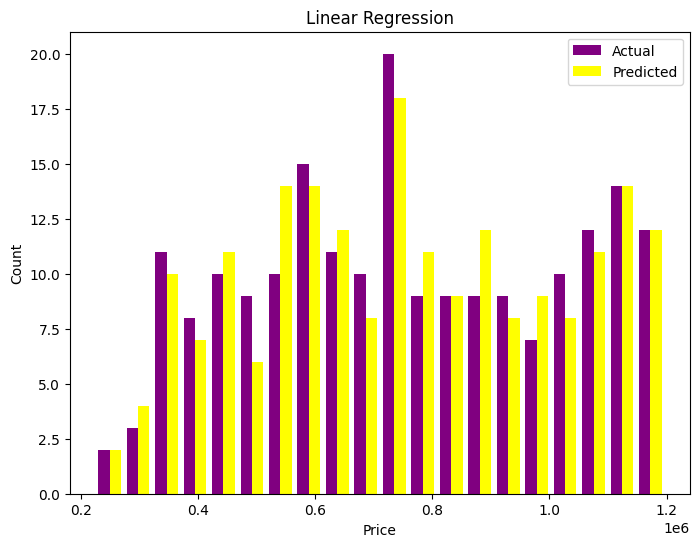

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_test_pred], bins=20, color=['purple', 'yellow'], label=['Actual', 'Predicted'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Linear Regression')
plt.legend()
plt.show()

Report Summary


In [ ]:
report = """
In this project, we built a basic linear regression model from scratch using Python to predict house prices based on features such as house size, number of bedrooms, and age.
We started by loading the dataset into a Pandas DataFrame, where we handled any missing data appropriately. To ensure consistency across all features, we applied normalization
using scikit-learn's `StandardScaler`.

Instead of relying on pre-built libraries like scikit-learn for the linear regression model, we calculated the model parameters—the slope and intercept—using the least squares
method. A custom function was then created to predict house prices based on these features.

We split the dataset into training and testing sets, training the model on the training data. The model's performance was evaluated using Mean Squared Error (MSE) on both the
training and testing sets. Finally, to visualize the results, we plotted the regression line along with the actual test data points to assess how well the model fit the data.
   """
print(report)


In this project, we built a basic linear regression model from scratch using Python to predict house prices based on features such as house size, number of bedrooms, and age.
We started by loading the dataset into a Pandas DataFrame, where we handled any missing data appropriately. To ensure consistency across all features, we applied normalization 
using scikit-learn's `StandardScaler`.

Instead of relying on pre-built libraries like scikit-learn for the linear regression model, we calculated the model parameters—the slope and intercept—using the least squares 
method. A custom function was then created to predict house prices based on these features.

We split the dataset into training and testing sets, training the model on the training data. The model's performance was evaluated using Mean Squared Error (MSE) on both the 
training and testing sets. Finally, to visualize the results, we plotted the regression line along with the actual test data points to assess how well the model 

# Report: Predicting House Prices with Linear Regression

## Introduction

In this project, I worked on building a linear regression model to predict house prices based on different features like size, number of bedrooms, and the age of the house. The goal was to understand how these features affect house prices and evaluate the performance of the model in predicting prices.

---

## 1. Data Preprocessing

### Checking for Missing Data

The first step was to check if the dataset had any missing values, as these could affect the model. I used the `isnull().sum()` function, and fortunately, there were no missing values. This made it easier to proceed without needing to fill or remove missing data.

### Scaling the Data

Since the features in the dataset (size, bedrooms, and age) have different units and ranges, I needed to standardize them. I used the `StandardScaler` from Scikit-Learn, which scales each feature so they have a mean of 0 and a standard deviation of 1. This step is important for linear regression because it ensures that all features are treated equally by the model.

```python
scaler = StandardScaler()
X = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age']])
```

---

## 2. Implementing the Linear Regression Model

### Model Equation

Linear regression is a simple model that predicts the target (house price) based on a weighted sum of the input features (size, bedrooms, and age). The equation looks like this:

\[
y = \theta_0 + \theta_1 \cdot X_1 + \theta_2 \cdot X_2 + \theta_3 \cdot X_3
\]

Where:
- \(y\) is the predicted price.
- \(\theta_0\) is the bias (intercept).
- \(\theta_1, \theta_2, \theta_3\) are the coefficients (weights) for the features.
- \(X_1, X_2, X_3\) are the feature values.

I calculated the model's parameters (thetas) using the **normal equation** method, which finds the best fit for the data without using iterative methods like gradient descent.

---

## 3. Model Training and Testing

### Splitting the Data

I split the data into a training set (80% of the data) and a test set (20%) using the `train_test_split` function. The model was trained on the training data and tested on the unseen test data.

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### Training the Model

The linear regression model was trained on the training data using the normal equation. This gave me the optimal values for \(\theta_0, \theta_1, \theta_2, \theta_3\).

```python
theta0, theta = linear_regression(X_train, y_train)
```

### Evaluating the Model

To check how well the model performs, I calculated the **Mean Squared Error (MSE)** on both the training and test sets. MSE measures the average squared difference between the actual and predicted prices. A lower MSE indicates better performance.

- **Training MSE**: 170277648.52
- **Testing MSE**: 167882080.37

The training and test MSE values are fairly close, which shows that the model isn't overfitting the data (i.e., it's not memorizing the training data but generalizing well to new data).

---

## 4. Conclusion

### Model Performance

The linear regression model performed reasonably well with training and test MSEs that were close in value. This suggests that the model generalizes well to new, unseen data. However, the model's predictions were not perfect, as there was still a gap between actual and predicted prices.

### Challenges

One of the main challenges I faced was scaling the features correctly. Since features like `Size (sqft)` and `Age` have different units, using them directly in the model would give more importance to larger values (like size), which would distort the predictions. Scaling solved this issue.

### Next Steps

1. **Add More Features**: The current model only uses three features (size, bedrooms, age). Including more features like location, number of bathrooms, or neighborhood quality could improve predictions.
2. **Use More Complex Models**: Linear regression is a simple model. Trying more complex models like decision trees or random forests could improve accuracy.
3. **Regularization**: Techniques like Lasso or Ridge regression could help reduce overfitting and improve model performance by adding a penalty for large coefficients.

---

This project helped me understand how linear regression works and how important data preprocessing is for building effective models. While the results were decent, there is definitely room for improvement by adding more features and experimenting with different models.